<a href="https://colab.research.google.com/github/sudarsana-reddy/ml-practice-repo/blob/main/ca_ml_shrink_rudge_model_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filepath = f'/content/{filename}'
print(filepath)

Saving boston.csv to boston (2).csv
/content/boston (2).csv


In [70]:
import pandas as pd
df = pd.read_csv(filepath)
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [71]:
from sklearn.model_selection import train_test_split


In [72]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']



In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)


In [76]:
r2_train = ridge.score(X_train, y_train)
r2_test = ridge.score(X_test, y_test)
print(f"R2 score on training set: {r2_train}")
print(f"R2 score on test set: {r2_test}")

R2 score on training set: 0.7508849668585106
R2 score on test set: 0.6687509462063155


In [77]:
import numpy as np
ridge = Ridge()
alphas = np.logspace(-3, 3, 10)
coef=[]
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    coef.append(ridge.coef_)

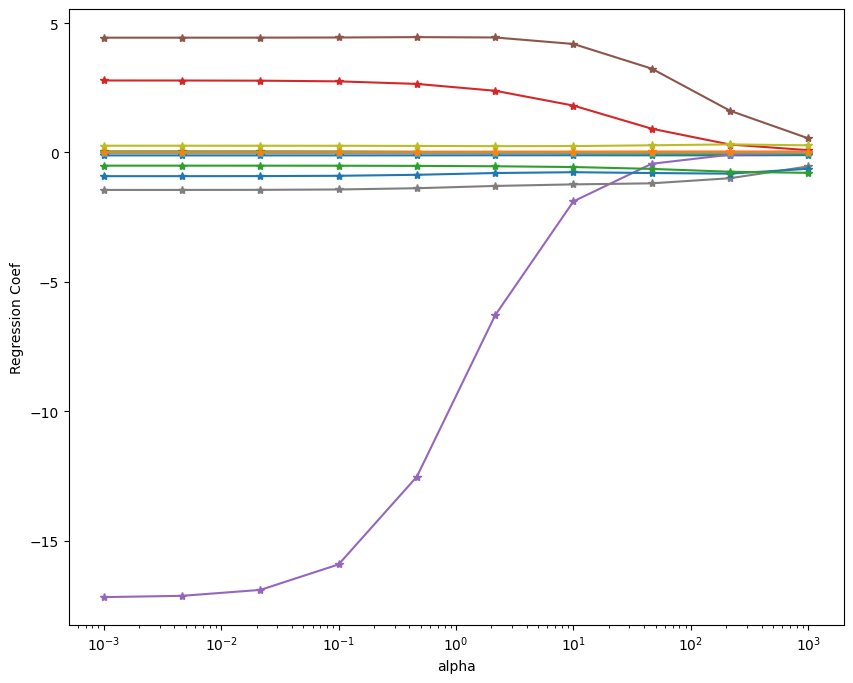

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(alphas, coef, marker='*')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Regression Coef')
ax.set_xlim(ax.get_xlim())
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.logspace(-3, 3, 10)}
grid_search = GridSearchCV(ridge, params, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(alpha=1000.0),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             return_train_score=True)

In [80]:
grid_search.best_score_

0.6986630100016842

In [81]:
grid_search.best_params_

{'alpha': 0.001}